## import dependencies

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
from subprocess import check_output
print(check_output(["ls", "../../resources/prices"]).decode("utf8"))

coin_Aave.csv
coin_BinanceCoin.csv
coin_Bitcoin.csv
coin_Cardano.csv
coin_ChainLink.csv
coin_Cosmos.csv
coin_CryptocomCoin.csv
coin_Dogecoin.csv
coin_EOS.csv
coin_Ethereum.csv
coin_Iota.csv
coin_Litecoin.csv
coin_Monero.csv
coin_NEM.csv
coin_Polkadot.csv
coin_Solana.csv
coin_Stellar.csv
coin_Tether.csv
coin_Tron.csv
coin_USDCoin.csv
coin_Uniswap.csv
coin_WrappedBitcoin.csv
coin_XRP.csv



## load and inspect data

In [3]:
btc_df = pd.read_csv(Path('../../resources/prices/coin_Bitcoin.csv'), index_col='SNo')
btc_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...
2858,Bitcoin,BTC,2021-02-23 23:59:59,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2859,Bitcoin,BTC,2021-02-24 23:59:59,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2860,Bitcoin,BTC,2021-02-25 23:59:59,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11


In [4]:
btc_df['Date'] = pd.to_datetime(btc_df['Date']).dt.date
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
btc_df['Spread'] = btc_df.High - btc_df.Low
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2862 entries, 1 to 2862
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       2862 non-null   object        
 1   Symbol     2862 non-null   object        
 2   Date       2862 non-null   datetime64[ns]
 3   High       2862 non-null   float64       
 4   Low        2862 non-null   float64       
 5   Open       2862 non-null   float64       
 6   Close      2862 non-null   float64       
 7   Volume     2862 non-null   float64       
 8   Marketcap  2862 non-null   float64       
 9   Spread     2862 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 246.0+ KB


## Plot the closing value of bitcoin over time

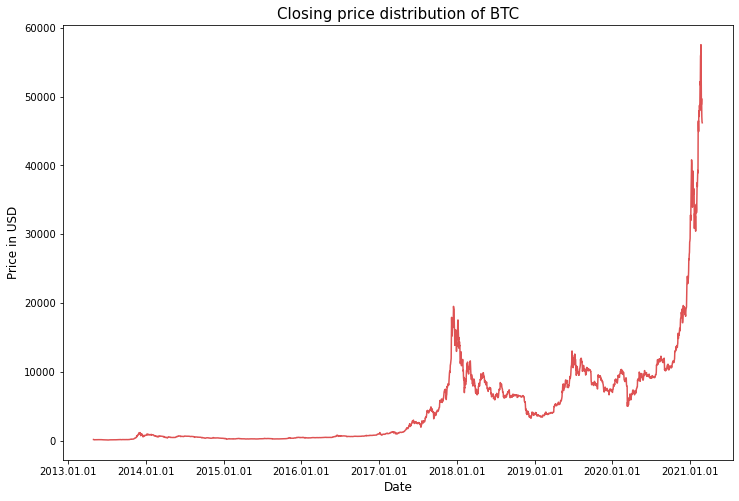

In [5]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = btc_df.Close.values, x=btc_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = btc_df.Close.values, x=btc_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of BTC", fontsize=15)
plt.show()

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

btc_df['Date_mpl'] = btc_df['Date'].apply(lambda x: mdates.date2num(x))

temp_btc_df = btc_df.copy(deep=False)
temp_btc_df = temp_btc_df.set_index(['Date'])
temp_btc_df = temp_btc_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_btc_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,15824.0
2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,15825.0
2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,15826.0
2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,15827.0
2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,15828.0
...,...,...,...,...,...,...
2021-02-23,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,18681.0
2021-02-24,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,18682.0
2021-02-25,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,18683.0


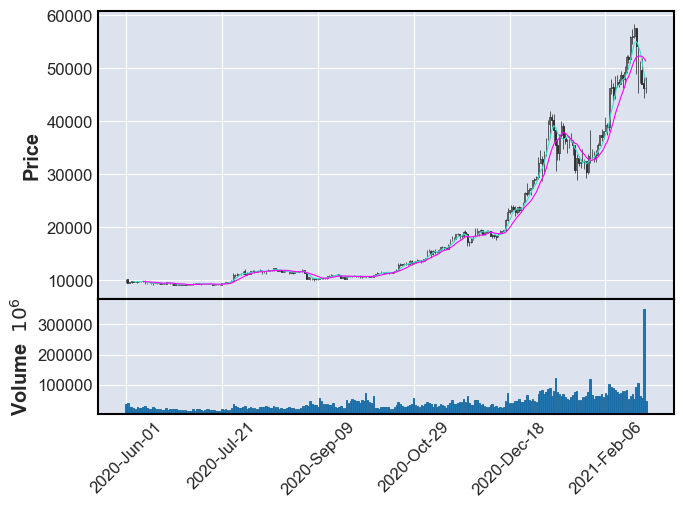

In [7]:
mpf.plot(temp_btc_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

## Price prediction

In [8]:
from fbprophet import Prophet

In [12]:
INPUT_FILE = "coin_Bitcoin.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']

m = Prophet()
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
274,2021-03-02 23:59:59,51630.187740,48712.082935,54804.809324
275,2021-03-03 23:59:59,52184.041311,49087.365929,55314.243396
276,2021-03-04 23:59:59,52515.745099,49583.425652,55573.262438
277,2021-03-05 23:59:59,52942.920537,49967.620890,56017.490616
278,2021-03-06 23:59:59,53325.424157,50132.784321,56346.458212


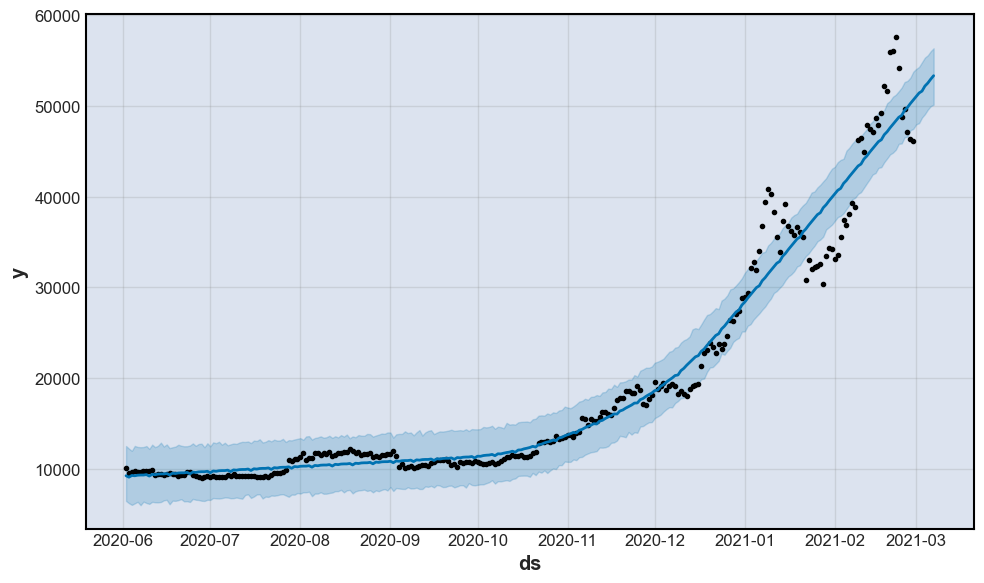

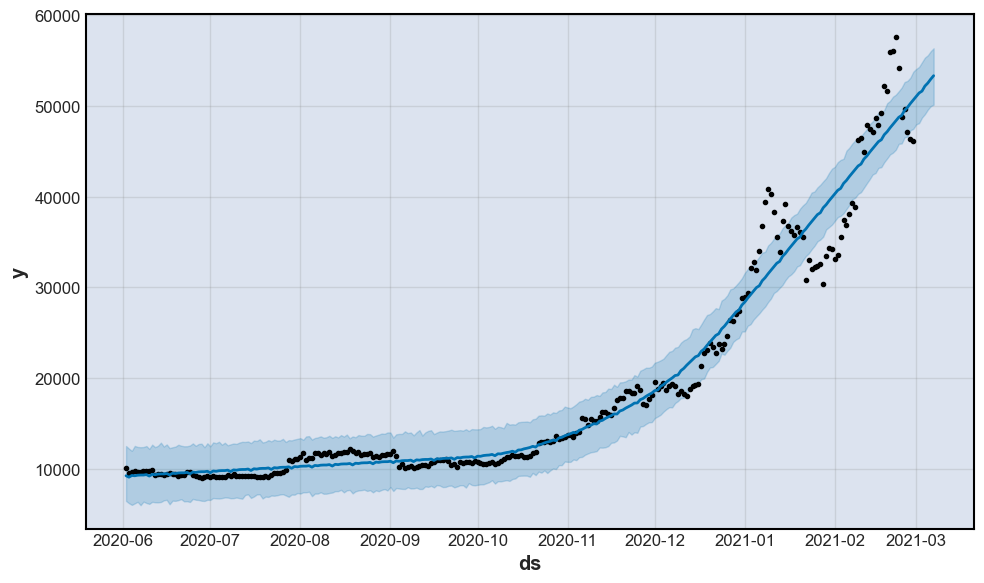

In [13]:
m.plot(forecast)

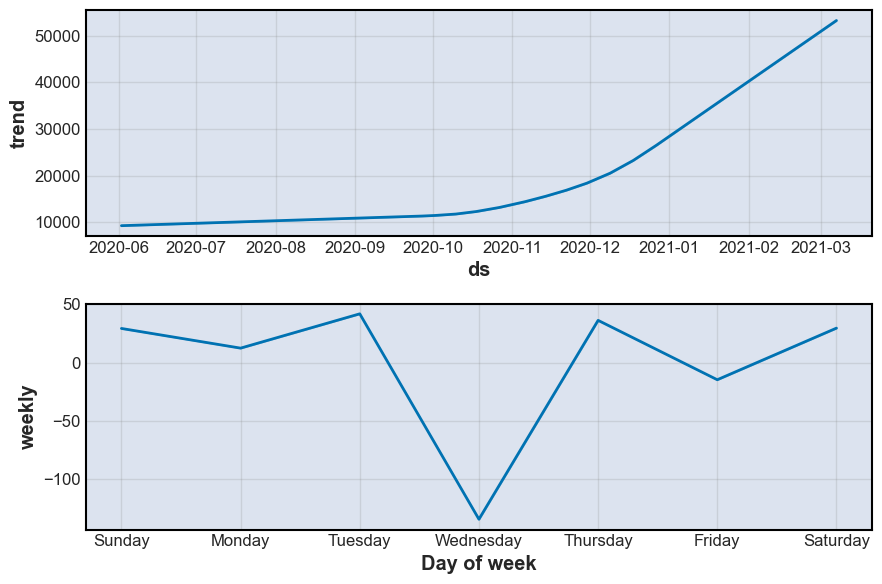

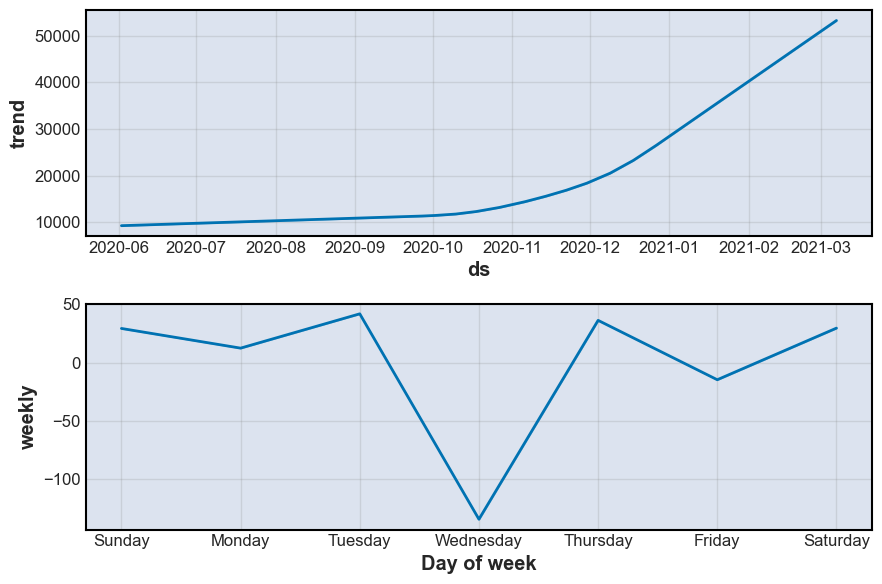

In [14]:
m.plot_components(forecast)